In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [34]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [35]:
import os

In [36]:
os.getcwd()

'/Users/i313121/Desktop/insofe/prayag_project/Files/SAA'

In [37]:
os.chdir("/Users/i313121/Desktop/insofe/prayag_project/Files/SAA")

In [38]:
parse = lambda x: datetime.strptime(x,"%d/%m/%y %H:%M")
data = pd.read_csv('saa_data_eastern_horizontal_displacement.csv',
                  parse_dates = True, index_col=0, date_parser=parse,
                  low_memory = False)

data.head()

,2.5,2.2,1.9,1.6,1.3,1,0.7,0.4,0.1
TIMESTAMP,,,,,,,,,
2013-05-01 14:00:00,0.0,0.05250,0.05956,-0.01381,-0.02104,-0.03476,-0.04653,-0.06661,-0.02817
2013-05-01 15:00:00,0.0,0.08976,0.14507,0.11240,0.06926,0.07962,0.10925,0.13041,0.17957
2013-05-01 16:00:00,0.0,0.03456,0.07399,0.04692,0.01004,0.03527,0.09187,0.03380,-0.03528
2013-05-01 17:00:00,0.0,0.03761,0.03218,0.01642,0.00059,-0.07230,-0.03770,-0.06455,-0.13372
2013-05-01 18:00:00,0.0,0.03689,0.10482,0.14188,0.08435,0.05884,0.08187,0.05118,0.00880


In [39]:
df=data.drop(['2.5', '2.2','1.9', '1.6','1.3','1','0.7','0.4'], axis=1)

In [40]:
df.head()

,0.1
TIMESTAMP,
2013-05-01 14:00:00,-0.02817
2013-05-01 15:00:00,0.17957
2013-05-01 16:00:00,-0.03528
2013-05-01 17:00:00,-0.13372
2013-05-01 18:00:00,0.00880


In [41]:
df.shape


(65570, 1)

In [42]:
df.isnull().sum()

0.1    15845
dtype: int64

In [43]:
df = df.interpolate(method='linear',limit_direction ='backward')


                            0.1
TIMESTAMP                      
2013-05-01 14:00:00   -0.028170
2013-05-01 15:00:00    0.179570
2013-05-01 16:00:00   -0.035280
2013-05-01 17:00:00   -0.133720
2013-05-01 18:00:00    0.008800
...                         ...
2020-10-23 11:00:00  574.179135
2020-10-23 12:00:00  574.320855
2020-10-23 13:00:00  574.198265
2020-10-23 14:00:00  574.184705
2020-10-23 15:00:00  574.457655

[65570 rows x 1 columns]


In [56]:
df.head()

,0.1
TIMESTAMP,
2013-05-01 14:00:00,-0.02817
2013-05-01 15:00:00,0.17957
2013-05-01 16:00:00,-0.03528
2013-05-01 17:00:00,-0.13372
2013-05-01 18:00:00,0.00880


In [44]:
df.isnull().sum()

0.1    0
dtype: int64

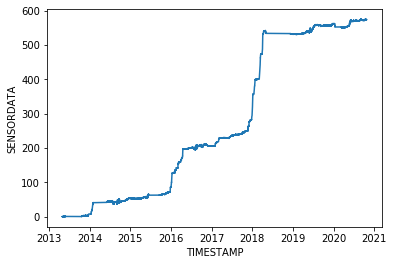

In [89]:

plt.xlabel('TIMESTAMP')
plt.ylabel('SENSORDATA')
plt.plot(df)



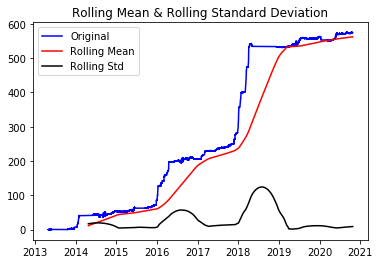

In [46]:
rolling_mean = df.rolling(window = 8640).mean()
rolling_std = df.rolling(window = 8640).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [47]:
result = adfuller(df['0.1'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.0303367878624089
p-value: 0.9609701585672213
Critical Values:
	1%: -3.4304498283608416
	5%: -2.861584122315483
	10%: -2.5667934848091876


In [15]:
##  p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary.

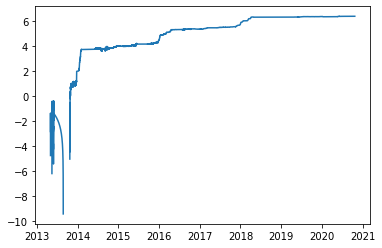

In [109]:
df_log = np.log(df)
plt.plot(df_log)

In [112]:
df_log.isnull().sum()

0.1    1758
dtype: int64

In [18]:
#df_log=df_log.dropna()

In [113]:
df_log = df_log.interpolate(method='linear',limit_direction ='backward')
print(df_log)

                          0.1
TIMESTAMP                    
2013-05-01 14:00:00 -1.717190
2013-05-01 15:00:00 -1.717190
2013-05-01 16:00:00 -2.722461
2013-05-01 17:00:00 -3.727732
2013-05-01 18:00:00 -4.733004
...                       ...
2020-10-23 11:00:00  6.352941
2020-10-23 12:00:00  6.353188
2020-10-23 13:00:00  6.352975
2020-10-23 14:00:00  6.352951
2020-10-23 15:00:00  6.353426

[65570 rows x 1 columns]


In [51]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=8640).mean()
    rolling_std = timeseries.rolling(window=8640).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['0.1'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

In [21]:
## Subtract the rolling mean

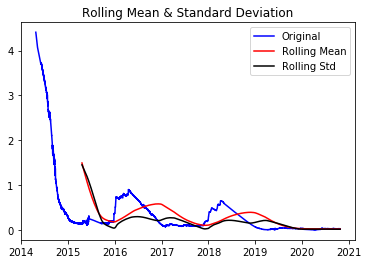

ADF Statistic: -13.465318247786591
p-value: 3.465641358707866e-25
Critical Values:
	1%: -3.4304649879585485
	5%: -2.8615908224514746
	10%: -2.5667970510865032


In [52]:
rolling_mean = df_log.rolling(window=8640).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

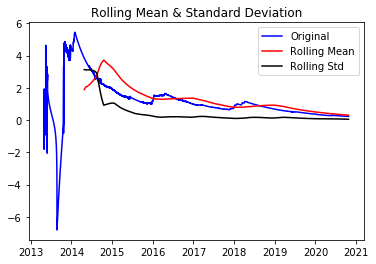

ADF Statistic: -2.8256214525463332
p-value: 0.054706101688623505
Critical Values:
	1%: -3.430449826836894
	5%: -2.8615841216419375
	10%: -2.56679348445068


In [53]:
rolling_mean_exp_decay = df_log.ewm(halflife=8640, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

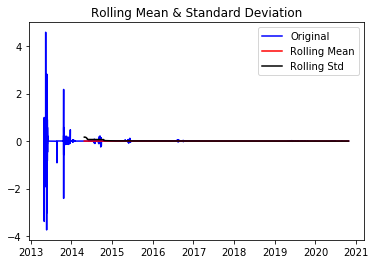

ADF Statistic: -34.772457080485005
p-value: 0.0
Critical Values:
	1%: -3.4304498298848354
	5%: -2.8615841229890493
	10%: -2.566793485167706


In [54]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

In [ ]:
################## on Non-Stattionary Data ##################

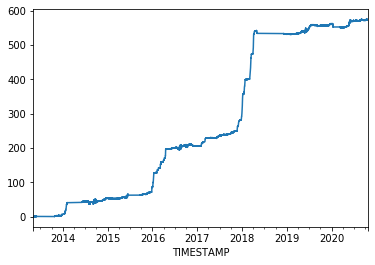

In [102]:


#train = df[:int(0.5*(len(df)))]
#valid = df[int(0.5*(len(df))):]



#plotting the data
df['0.1'].plot()
#valid['0.1'].plot()

In [63]:
from pmdarima.arima import auto_arima

In [97]:

model = auto_arima(df['0.1'], trace=True, error_action='ignore', suppress_warnings=True)
model.fit(df['0.1'])


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-5577.602, Time=24.61 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=47421.356, Time=1.15 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=24545.843, Time=2.31 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=4.15 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-5579.598, Time=12.34 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-5522.780, Time=7.16 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-5456.848, Time=6.00 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-5521.006, Time=13.53 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-5572.797, Time=10.98 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-5551.883, Time=11.02 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-5576.909, Time=19.36 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-4772.863, Time=46.29 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0]          
Total fit time: 158.926 seconds


ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [99]:

forecast = model.predict(n_periods=len(df['0.1']))

forecast = pd.DataFrame(forecast,index = df.index,columns=['Prediction'])


#plot the predictions for validation set


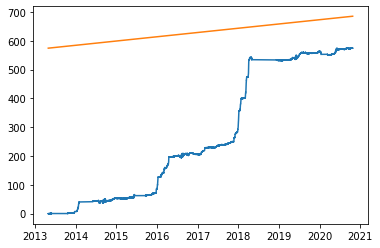

In [103]:
plt.plot(df, label='Train')

plt.plot(forecast, label='Prediction')
plt.show()

In [104]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(df,forecast))
print(rms)

405.0572865685575


In [ ]:

#####################  STATIONARY DATA with log ##################


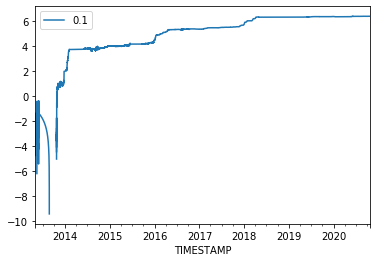

In [110]:







#plotting the data

df_log.plot()

In [ ]:
#building the model
#from pyramid.arima import auto_arima
model = auto_arima(df_log['0.1'], trace=True, error_action='ignore', suppress_warnings=True)
model.fit(df_log['0.1'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-191847.961, Time=82.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-181140.179, Time=5.79 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-189210.985, Time=6.00 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-191562.528, Time=17.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-181141.910, Time=1.89 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-191571.781, Time=43.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-191785.237, Time=41.97 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-192023.339, Time=80.83 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-191901.088, Time=71.75 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-191939.634, Time=88.94 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-192094.012, Time=92.99 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-192168.247, Time=82.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-191780.548, Time=109.29 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-192057

In [ ]:
forecastlog = model.predict(n_periods=len(df_log['0.1']))

#predictions_ARIMA = np.exp(forecast) 

forecastlog = pd.DataFrame(forecast,index = df_log.i,columns=['Prediction'])


#plot the predictions for validation set

In [ ]:
plt.plot(df_log, label='Train')

plt.plot(forecast, label='Prediction')
plt.show()

In [ ]:
######### Stationary data with exponential log ############

In [ ]:
df_log_exp_decay.plot()

In [ ]:

model = auto_arima(df_log_exp_decay['0.1'], trace=True, error_action='ignore', suppress_warnings=True)
model.fit(df_log_exp_decay['0.1'])

In [ ]:
forecastlogdecay = model.predict(n_periods=len(df_log_exp_decay['0.1']))

forecastlogdecay = pd.DataFrame(forecastlogdecay,index = df_log_exp_decay.index,columns=['Prediction'])


In [ ]:
plt.plot(df_log_exp_decay, label='Train')

plt.plot(forecastlogdecay, label='Prediction')
plt.show()